In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ODE's du système

$\begin{cases}
\dot{h}_{1}(t)=\frac{1}{A_{c}}\times\left(q_{in}(t)-c_{1}\sqrt{h_{1}(t)}\right)\\
\dot{h}_{2}(t)=\frac{1}{A_{c}}\times\left(c_{1}\sqrt{h_{1}(t)}-c_{2}\sqrt{h_{2}(t)}\right)
\end{cases}$

# Code pour la simulation

In [56]:
# Source : https://www.youtube.com/watch?v=U7uyj9BaNKg
def tank(h,t):
    c1 = 0.13
    c2 = 0.20
    Ac = 2.0
    if t>0.5:
        qin = 0.5
    else:
        qin = 1.0
    qout1 = c1 * h[0]**0.5
    qout2 = c2 * h[1]**0.5
    dhdt1 = (qin-qout1)/Ac
    dhdt2 = (qout1-qout2)/Ac
    if h[0]>=1 and dhdt1>0:
        dhdt1 = 0
    if h[1]>=1 and dhdt2>0:
        dhdt2 = 0
    dhdt = [dhdt1,dhdt2]
    return dhdt

h0 = [0,0]
t = np.linspace(0,10,100)
y = odeint(tank,h0,t,hmax=0.1)

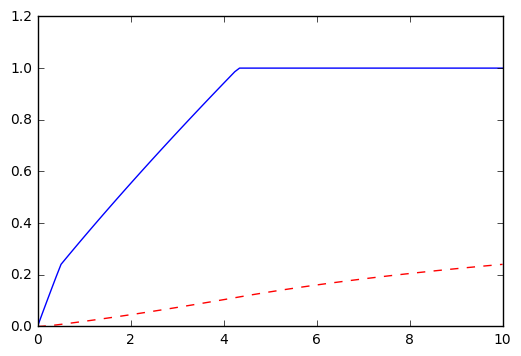

In [57]:
plt.plot(t,y[:,0],'b-');
plt.plot(t,y[:,1],'r--');